In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import codecs
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
with codecs.open('sales_data_sample.csv', 'r', encoding='latin1') as f:
    df = pd.read_csv(f)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [6]:
df.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [7]:
df.shape

(2823, 25)

In [8]:
X = df[['QUANTITYORDERED', 'ORDERLINENUMBER']]
df = df.dropna()
X

,QUANTITYORDERED,ORDERLINENUMBER
0,30,2
1,34,5
2,41,2
3,45,6
4,49,14
...,...,...
2818,20,15
2819,29,1
2820,43,4
2821,34,1


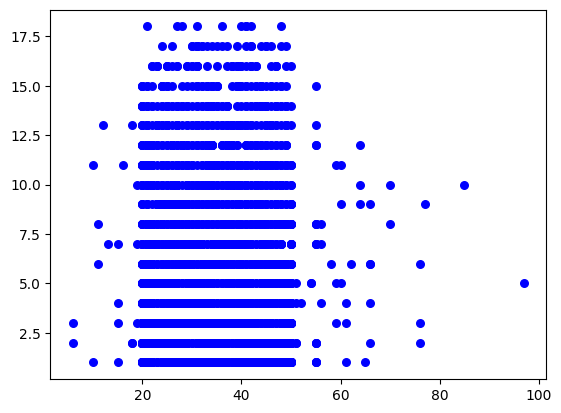

In [9]:
p="QUANTITYORDERED"
q="ORDERLINENUMBER"
plt.scatter(X[p], X[q], s = 30, c = 'b')
plt.show()

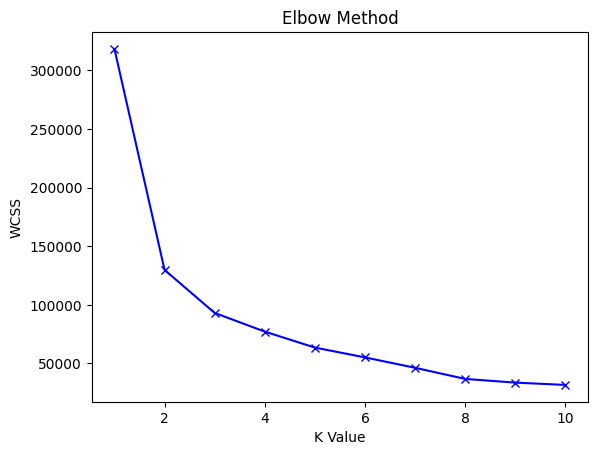

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

ks = range(1, 11)
plt.plot(ks, wcss, 'bx-')
plt.title("Elbow Method")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()  # Don't forget to call show() to display the plot

In [12]:
!pip install kneed

In [13]:
from kneed import KneeLocator

k=KneeLocator(ks,wcss,curve="convex",direction="decreasing")
optimal_k=k.elbow
print(f"The optimal number of clusters ={optimal_k}")

The optimal number of clusters =3


In [15]:
Kmean = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
Kmean.fit(X)

KMeans(n_clusters=3, random_state=42)

In [16]:
y_kmeans = Kmean.predict(X)

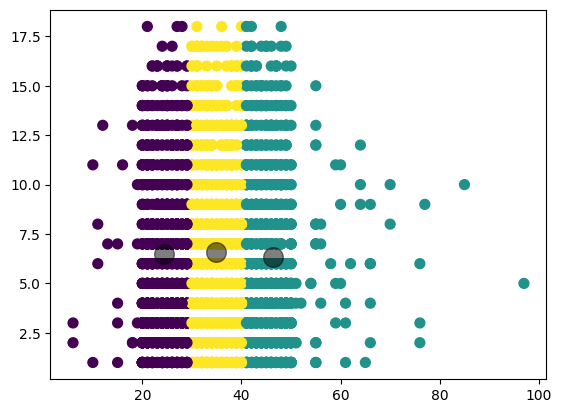

In [18]:
#plotting the results:
plt.scatter(X[p], X[q], c=y_kmeans, s=50, cmap='viridis')
centers = Kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)